# 5.2

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import time
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

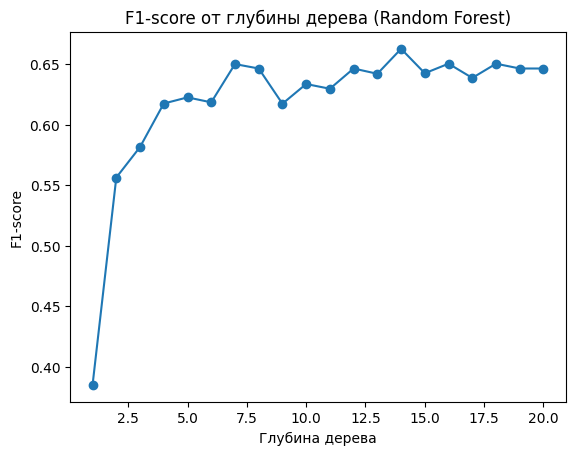

In [19]:
depths = range(1, 21)
scores = []

for d in depths:
    rf = RandomForestClassifier(max_depth=d, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

plt.plot(depths, scores, marker='o')
plt.xlabel('Глубина дерева')
plt.ylabel('F1-score')
plt.title('F1-score от глубины дерева (Random Forest)')
plt.show()

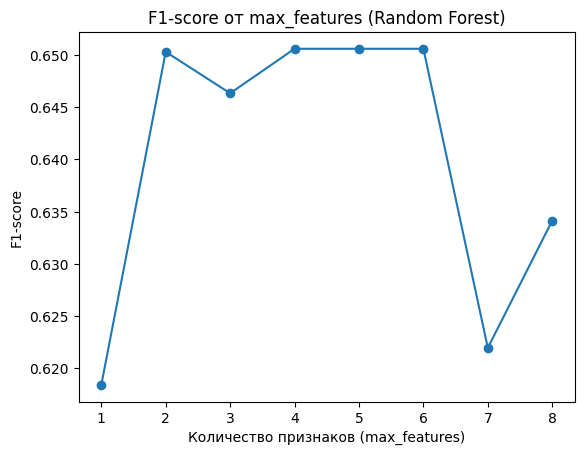

In [20]:
features_range = range(1, X.shape[1] + 1)
scores = []

for f in features_range:
    rf = RandomForestClassifier(max_features=f, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

plt.plot(features_range, scores, marker='o')
plt.xlabel('Количество признаков (max_features)')
plt.ylabel('F1-score')
plt.title('F1-score от max_features (Random Forest)')
plt.show()

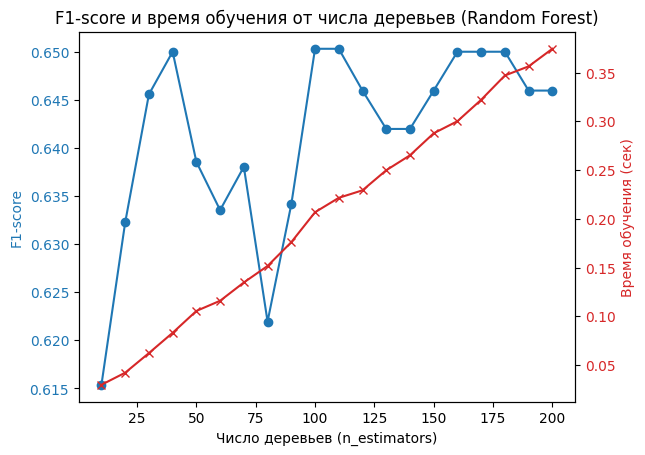

In [21]:
n_estimators_range = range(10, 201, 10)
scores = []
times = []

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    start = time.time()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    end = time.time()
    scores.append(f1_score(y_test, y_pred))
    times.append(end - start)

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Число деревьев (n_estimators)')
ax1.set_ylabel('F1-score', color=color)
ax1.plot(n_estimators_range, scores, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Время обучения (сек)', color=color)
ax2.plot(n_estimators_range, times, color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('F1-score и время обучения от числа деревьев (Random Forest)')
plt.show()

In [26]:
xgb = XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, subsample=0.8, random_state=42)
start = time.time()
xgb.fit(X_train, y_train)
end = time.time()
y_pred = xgb.predict(X_test)

print("Время обучения XGBoost:", end - start, "сек")
print(classification_report(y_test, y_pred))

Время обучения XGBoost: 0.05734586715698242 сек
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       151
           1       0.61      0.69      0.65        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.74       231

